# HW2
### Section: F2
### Group Member: Enbo Chi, Jiameng Gu, Di Han, Bohan Wang


# Question 1

# Part A

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
years = np.arange(2012,2022)
prices = np.array([[15.50, 20.29, 29.26, 28.62, 31.12, 40.73, 42.45, 55.49, 47.34, 50.20], \
                   [20.94, 26.47, 26.21, 24.80, 27.39, 37.82, 42.04, 40.16, 42.83, 43.67]])

## Q1

In [27]:
returns = prices[:,1:]/prices[:,0:-1]-1
meanrets = returns.mean(axis=1)
sd = returns.std(axis=1)
print("Mean Returns:\n", meanrets)
print("Standard Deviations:\n", sd)

Mean Returns:
 [0.15426224 0.09318432]
Standard Deviations:
 [0.1830632  0.13733589]


## Q2

In [28]:
returns_INTC = meanrets[0]
returns_NATI = meanrets[1]
sd_INTC = sd[0]
sd_NATI = sd[1]

weights_INTC = np.arange(0, 1+1e-10, 0.0001)
weights = weights_INTC.reshape((1,10001))

## Q3

In [29]:
correlations = np.linspace(-0.95, 0.95, 500)
corr = correlations.reshape((500,1))

# Part B

## Q1

In [30]:
portfolio_exprets = weights*returns_INTC + (1-weights)*returns_NATI
portfolio_vols = np.sqrt((weights * sd_INTC)**2 + ((1-weights)*sd_NATI)**2 + 2*weights*(1-weights)*corr*sd.prod())

## Q2

In [31]:
rfrate = 0.0458
cal_slopes = (portfolio_exprets - rfrate) / (portfolio_vols - 0)
cal_slopes = cal_slopes[:,1:]

## Q3

In [32]:
frontier_slopes = np.diff(portfolio_exprets) / np.diff(portfolio_vols)

## Q4

In [33]:
tangency_idx = abs(cal_slopes-frontier_slopes).argmin(axis=1)
portfolio_weights_INTC = weights.flatten()[tangency_idx]
portfolio_weights_NATI = 1 - portfolio_weights_INTC

# Part C

## Q1

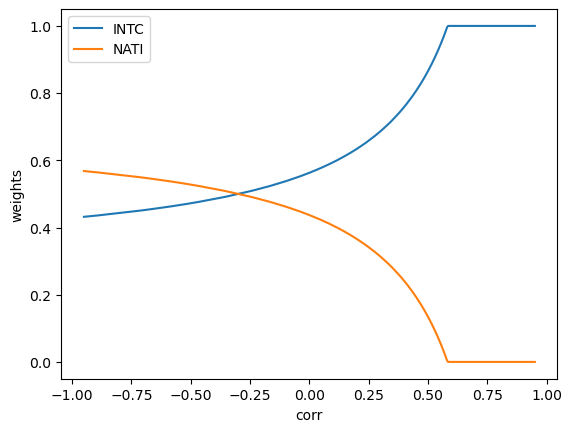

In [34]:
def plot_Tangency_Portfolio_Weights():
    plt.plot(corr,portfolio_weights_INTC, label='INTC')
    plt.plot(corr,portfolio_weights_NATI, label='NATI')
    plt.xlabel('corr')
    plt.ylabel('weights')
    plt.legend()

plot_Tangency_Portfolio_Weights()
plt.show()

## Q2

With the increase of correlation, NATI's proportion decreases and the INTC's proportion increase. 
Because with the increase of correlation with two assets, there would be a higher weight of one with higher Sharpe ratio. And the other asset's weight will goes down. In this portofolio, INTC has a higher Sharpe ratio, so INTC's proportion in the portfolio will increase and  NATI's proportion will decrease with the increase of correlation.

## Q3

If we could sell short, INTC's weight could be greater than 1, and NATI's weight could be less than 0. As shown above, when the correlation is 0.58446894, the portfolio weights would change, which INTC's weight would be greater than 1, and NATI's weight would be less than 0. In order to allow for short-selling, We define variables with weight set to 30,000 variables between -1,2 weight = np.linspace(-1,2,30001). The detaild code and results are following.

In [35]:
weights_INTC_new = np.arange(-1, 2+1e-10, 0.0001)
weights_new = weights_INTC_new.reshape((1,30001))
portfolio_exprets_new = weights_new * returns_INTC + (1-weights_new) * returns_NATI
portfolio_vols_new = np.sqrt((weights_new * sd_INTC)**2 + ((1-weights_new)*sd_NATI)**2 + 2* weights_new*(1-weights_new)*corr*sd.prod())

In [36]:
cal_slopes_new = (portfolio_exprets_new - rfrate) / (portfolio_vols_new - 0)
frontier_slopes_new = np.diff(portfolio_exprets_new) / np.diff(portfolio_vols_new)
cal_slopes_new = cal_slopes_new[:,1:]
tangency_idx_new = abs(cal_slopes_new-frontier_slopes_new).argmin(axis=1)
portfolio_weights_INTC_new = weights_new.flatten()[tangency_idx_new]
portfolio_weights_NATI_new = 1 - portfolio_weights_INTC_new

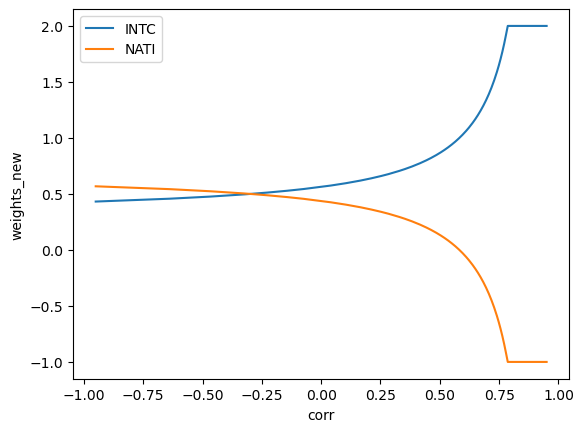

In [37]:
def plot_Tangency_Portfolio_Weights_new():
    plt.plot(corr,portfolio_weights_INTC_new, label='INTC')
    plt.plot(corr,portfolio_weights_NATI_new, label='NATI')
    plt.xlabel('corr')
    plt.ylabel('weights_new')
    plt.legend()

plot_Tangency_Portfolio_Weights_new()
plt.show()